In [7]:
%pylab inline

# Point to Brian's installation of pyglow, because the ugrad user
# has an old version which is slower, and I can't figure out how
# to update it without spending a lot of time.
#import sys
#sys.path.insert(0, '/home/bhardin2/.local/lib/python2.7/site-packages')


import FUV_L2 # for analyzing simulated data
from pyglow import pyglow # for ionospheric models
from datetime import datetime, timedelta
import ICON

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:

ze = array([  98.        ,   98.12121212,   98.24242424,   98.36363636,
         98.48484848,   98.60606061,   98.72727273,   98.84848485,
         98.96969697,   99.09090909,   99.21212121,   99.33333333,
         99.45454545,   99.57575758,   99.6969697 ,   99.81818182,
         99.93939394,  100.06060606,  100.18181818,  100.3030303 ,
        100.42424242,  100.54545455,  100.66666667,  100.78787879,
        100.90909091,  101.03030303,  101.15151515,  101.27272727,
        101.39393939,  101.51515152,  101.63636364,  101.75757576,
        101.87878788,  102.        ,  102.12121212,  102.24242424,
        102.36363636,  102.48484848,  102.60606061,  102.72727273,
        102.84848485,  102.96969697,  103.09090909,  103.21212121,
        103.33333333,  103.45454545,  103.57575758,  103.6969697 ,
        103.81818182,  103.93939394,  104.06060606,  104.18181818,
        104.3030303 ,  104.42424242,  104.54545455,  104.66666667,
        104.78787879,  104.90909091,  105.03030303,  105.15151515,
        105.27272727,  105.39393939,  105.51515152,  105.63636364,
        105.75757576,  105.87878788,  106.        ,  106.12121212,
        106.24242424,  106.36363636,  106.48484848,  106.60606061,
        106.72727273,  106.84848485,  106.96969697,  107.09090909,
        107.21212121,  107.33333333,  107.45454545,  107.57575758,
        107.6969697 ,  107.81818182,  107.93939394,  108.06060606,
        108.18181818,  108.3030303 ,  108.42424242,  108.54545455,
        108.66666667,  108.78787879,  108.90909091,  109.03030303,
        109.15151515,  109.27272727,  109.39393939,  109.51515152,
        109.63636364,  109.75757576,  109.87878788,  110.        ])

M = len(ze)
az = zeros(M) # set a constant azimuth angle (0 --> North)

Bright = array([  16789.00980018,   17643.97989054,   18266.35484282,
         18997.23176785,   19526.85503373,   20482.53150057,
         21392.54804633,   22054.53735522,   23039.64617539,
         23853.25187731,   25060.13745704,   26144.67990327,
         27142.99350897,   28345.26536846,   29343.89716177,
         30699.5354461 ,   32010.30927835,   33461.56293751,
         35018.2957872 ,   36466.20847652,   38080.85147003,
         39992.68168512,   41729.50871834,   43754.93190785,
         45708.6037928 ,   47947.8490518 ,   50097.36540664,
         52619.79763268,   54828.81506936,   57842.21076747,
         60632.55695558,   63374.85681558,   66598.09723813,
         69570.9240168 ,   73456.31284205,   76665.23482245,
         80725.94501718,   84849.17907598,   89040.66437572,
         93410.49382716,   98074.16953036,  103035.98701795,
        107879.12052946,  113405.56191931,  119078.68779432,
        124712.83568792,  131057.65559374,  136551.16456663,
        143378.67506682,  149927.61232022,  156732.69059437,
        163716.27211404,  170367.34758814,  177736.89067074,
        184221.23584065,  191502.0045819 ,  198058.10105638,
        205243.57261041,  211774.21407662,  217737.04976454,
        223801.86457936,  228924.20771287,  234136.43884434,
        237814.68753977,  240777.49140893,  243035.35064274,
        243576.26956854,  243243.92261677,  241344.81990582,
        238505.63192058,  234646.49357261,  229457.80832379,
        223244.39989818,  217156.67557592,  210729.28598702,
        203873.13860252,  196879.85236095,  190191.70803106,
        184112.73386789,  177925.41682576,  172604.04734632,
        167344.24716813,  162474.86317933,  158522.65495736,
        154476.89957999,  151290.40982563,  147819.61944763,
        145120.11582029,  142032.26422299,  139252.25913198,
        136928.53506427,  134361.71566756,  132327.38322515,
        130220.02672776,  128141.14802087,  126364.86572483,
        124616.58393789,  122677.5486827 ,  121029.65508464,
        119664.94845361])

In [13]:
# Specify satellite position
satlat = 0. # deg
satlon = 0. # deg
satalt = 575. # km
# Specify time
t = datetime(2009, 3, 23, 1, 0, 0) # (year, month, day, hour, min, sec). Make sure it is nighttime.

# Calculate tangent altitudes
tang_alts = zeros(M)
sat_lla = [satlat, satlon, satalt]
for m in range(M):
    lla = ICON.tangent_point(sat_lla, az[m], ze[m])
    tang_alts[m] = lla[2]

# Inversion parameters
reg_method = 'Tikhonov' # 'Tikhonov' or 'MAP'
regu_order = 2 # 2 = curvature minimization, 1 = gradient minimization
contribution = 'RR' # 'RR' or 'RRMN' depending on if you want to correct for mutual neutralization

# Run inversion to get electron density
ver, ne, alt = FUV_L2.FUV_Level_2_Density_Calculation(Bright, tang_alts, sat_lla, 
                                                   az, ze, 
                                                   reg_method=reg_method, regu_order=regu_order,
                                                   Spherical = True, # True = Spherical Earth, False = WGS84 Earth
                                                   contribution=contribution,
                                                   Sig_Bright = None, # input covariance (ignore for now)
                                                   dn = t,
                                                  )

# Analyze electron density find maximum
hmF2, NmF2 = FUV_L2.find_hm_Nm_F2(ne, alt, interpolate_F2=True, interval_increase = 10.)

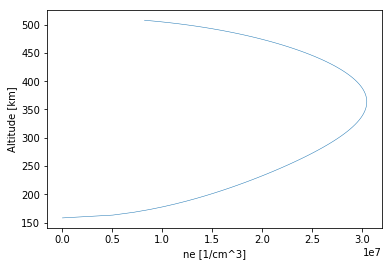

In [16]:
plot(ne, tang_alts, '-',markersize=2, linewidth=0.5)
xlabel('ne [1/cm^3]')
ylabel('Altitude [km]')
#xlim(0,2*ne.max())